<a href="https://colab.research.google.com/github/linkvarun/Jupyter_Notebook/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autoencoders

![alt text](https://cdn-images-1.medium.com/max/1818/1*8ixTe1VHLsmKB3AquWdxpQ.png)

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

In [ ]:
encoding_dim = 49 # size of latent layer
input_img = Input(shape=(784,))

#encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)

#decoded - reconstruction of its encoded representation
decoded = Dense(784, activation='sigmoid')(encoded)

#this model maps an input to its encoded representation
autoencoder = Model(input_img, decoded)

#seperate encoder model
encoder = Model(input_img, encoded)

#placeholder for an encoded input
encoded_input = Input(shape=(encoding_dim,))

#retrive the last layer of the auto-encoder model
decoder_layer = autoencoder.layers[-1]

#create a decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 49)                38465     
                                                                 
 dense_1 (Dense)             (None, 784)               39200     
                                                                 
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
235/235 [==============================] - 4s 4ms/step - loss: 0.2592 - val_loss: 0.1742
Epoch 2/30
235/235 [==============================] - 1s 4ms/step - loss: 0.1547 - val_loss: 0.1366
Epoch 3/30
235/235 [==============================] - 1s 4ms/step - loss: 0.1279 - val_loss: 0.1177
Epoch 4/30
235/235 [==============================] - 1s 4ms/step - loss: 0.1128 - val_loss: 0.1059
Epoch 5/30
235/235 [==============================] - 1s 4ms/step - loss: 0.1030 - val_loss: 0.0978
Epoch 6/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0961 - val_loss: 0.0923
Epoch 7/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0912 - val_loss: 0.0882
Epoch 8/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0877 - val_loss: 0.0852
Epoch 9/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0852 - val_loss: 0.0833
Epoch 10/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0835 - val_loss: 0.0819

In [ ]:
encoded_imgs = encoder.predict(x_test)
recontructed_imgs = decoder.predict(encoded_imgs)

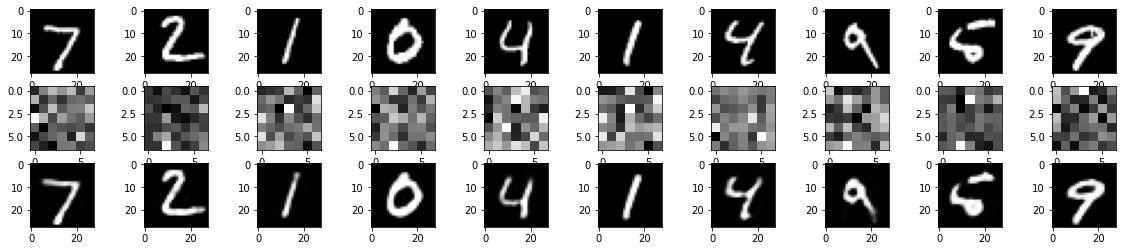

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')


    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(7, 7), cmap='gray')

    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(recontructed_imgs[i].reshape(28, 28), cmap='gray')
plt.show()

### Deep Autoencoder

In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6927 - val_loss: 0.6927
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6926 - val_loss: 0.6926
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6925 - val_loss: 0.6925
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6924 - val_loss: 0.6924
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6922 - val_loss: 0.6922

### Convolution Autoencoder

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

In [ ]:
input_img = Input(shape=(28, 28, 1))

In [ ]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [ ]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584 

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True)

(60000, 28, 28)
Epoch 1/10


TypeError: ignored